In [ ]:
!pip install tweet-preprocessor
!pip install textblob
!pip install sastrawi
!pip install emoji
!pip install pandas
!pip install matplotlib
!pip install PySastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=34a560869b1bd21e84f632787e481b4e685e9b086fd9c05023e718abd7a2d161
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: h

In [ ]:
import pandas as pd
import os
import re
import string
import numpy as np

In [ ]:
df = pd.read_csv('/content/FIFAHasil_en.csv')
df.head(10)

,Hasil
0,potential sanctions against the may also be de...
1,professional social media professional netizen...
2,"the scenario is like this, Argentina failed to..."
3,"it's a shame it's cancelled, canceled for Indo..."
4,cancellation of host Indonesia wisdom from Isr...
5,thank the israel team for playing accept yes t...
6,Indonesia cancel replacement country more
7,the suggestion of an event to cancel the issue...
8,cancel indonesia banned league stop officially...
9,"Stupid people say it's cancelled, blame the po..."


# Pengelompokan Komentar dengan Lexicon

In [ ]:
#Lexicon Based
!pip install VaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [ ]:
scores = [analyser.polarity_scores(x) for x in df['Hasil']]
print(scores)
df['Compound_Score'] = [x['compound'] for x in scores]

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.237, 'neu': 0.645, 'pos': 0.118, 'compound': -0.6597}, {'neg': 0.142, 'neu': 0.558, 'pos': 0.299, 'compound': 0.7351}, {'neg': 0.199, 'neu': 0.502, 'pos': 0.299, 'compound': 0.5267}, {'neg': 0.101, 'neu': 0.749, 'pos': 0.15, 'compound': 0.2732}, {'neg': 0.05, 'neu': 0.451, 'pos': 0.499, 'compound': 0.9423}, {'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'compound': -0.25}, {'neg': 0.15, 'neu': 0.674, 'pos': 0.176, 'compound': 0.1779}, {'neg': 0.355, 'neu': 0.457, 'pos': 0.188, 'compound': -0.765}, {'neg': 0.312, 'neu': 0.36, 'pos': 0.328, 'compound': 0.1027}, {'neg': 0.347, 'neu': 0.503, 'pos': 0.151, 'compound': -0.7666}, {'neg': 0.229, 'neu': 0.361, 'pos': 0.41, 'compound': 0.3612}, {'neg': 0.233, 'neu': 0.596, 'pos': 0.171, 'compound': -0.5423}, {'neg': 0.0, 'neu': 0.573, 'pos': 0.427, 'compound': 0.9169}, {'neg': 0.222, 'neu': 0.676, 'pos': 0.102, 'compound': -0.3591}, {'neg': 0.091, 'neu': 0.817, 'pos': 0.091, 'compound':

In [ ]:
df.head()

,Hasil,Compound_Score
0,potential sanctions against the may also be de...,0.0000
1,professional social media professional netizen...,-0.6597
2,"the scenario is like this, Argentina failed to...",0.7351
3,"it's a shame it's cancelled, canceled for Indo...",0.5267
4,cancellation of host Indonesia wisdom from Isr...,0.2732


In [ ]:
df.nsmallest(10, ['Compound_Score'])

,Hasil,Compound_Score
156,white group party governor gangar disappointed...,-0.9531
871,violating the rules violating the country's co...,-0.9432
818,drawing bali canceled governor of bali cadres ...,-0.9382
87,the public debates canceling the issue of Isra...,-0.9246
489,"Indonesia is threatened with cancellation, the...",-0.9217
17,refusing to cancel indo resentful reason for c...,-0.9201
68,indonesia cancels host rejects israel lack of ...,-0.9201
559,bloc politicians refused the arrival of the is...,-0.9153
942,Indonesia is threatened with the sanction of d...,-0.9099
399,violation of the use of gas bombs sanctions ev...,-0.9001


In [ ]:
#Compound Score Lexicon Based
df.loc[df["Compound_Score"] <= 0, 'Sentiments'] = 'Negatif'
df.loc[df["Compound_Score"] >= 0.1, 'Sentiments'] = 'Positif'
df.head()

,Hasil,Compound_Score,Sentiments
0,potential sanctions against the may also be de...,0.0000,Negatif
1,professional social media professional netizen...,-0.6597,Negatif
2,"the scenario is like this, Argentina failed to...",0.7351,Positif
3,"it's a shame it's cancelled, canceled for Indo...",0.5267,Positif
4,cancellation of host Indonesia wisdom from Isr...,0.2732,Positif


In [ ]:
df.to_csv('hasilPembobotanFIFA_en_V2.csv', encoding='utf8', index=False)

946


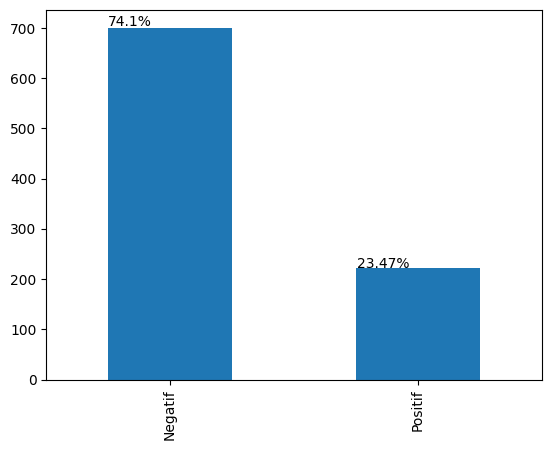

In [ ]:
s = pd.value_counts(df['Sentiments'])
ax = s.plot.bar()
n = len(df.index)
print(n)
for p in ax.patches:
  ax.annotate(str(round(p.get_height() / n * 100, 2)) + '%', (p.get_x() * 1.005, p.get_height() * 1.005))

# Word Cloud

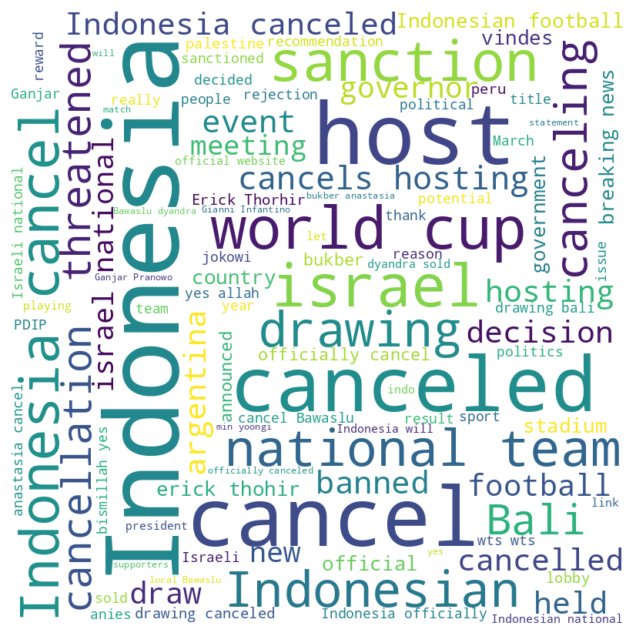

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

"""# Load data from CSV file
df = pd.read_csv('/content/FIFAHasil.csv', encoding='utf-8')"""

# Concatenate all text data into one string
text = ' '.join(df['Hasil'])

# Generate wordcloud
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100, contour_width=3, contour_color='steelblue')
wordcloud.generate(text)

# Visualize the wordcloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

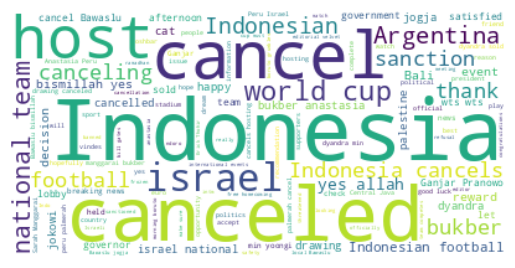

In [ ]:
"""# load data dari file csv
data = pd.read_csv('/content/FIFAHasil.csv')"""

# filter data dengan sentimen positif
data_positif = df[df['Sentiments'] == 'Positif']

# gabungkan semua tweet menjadi satu string
all_tweets = " ".join(tweet for tweet in data_positif['Hasil'])

# generate wordcloud
wordcloud = WordCloud(background_color="white").generate(all_tweets)

# tampilkan wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

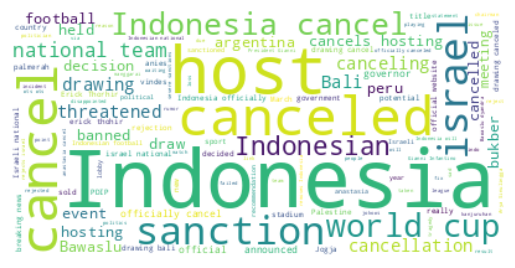

In [ ]:
"""# load data dari file csv
data = pd.read_csv('/content/FIFAHasil.csv')"""

# filter data dengan sentimen positif
data_positif = df[df['Sentiments'] == 'Negatif']

# gabungkan semua tweet menjadi satu string
all_tweets = " ".join(tweet for tweet in data_positif['Hasil'])

# generate wordcloud
wordcloud = WordCloud(background_color="white").generate(all_tweets)

# tampilkan wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Klasifikasi dengan Naive Bayes

In [ ]:
!pip install nltk
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
DataKlasifikasi = pd.read_csv('/content/FIFAHasil_V2.csv')

In [ ]:
DataKlasifikasi.head(10)

,Hasil,Sentiments
0,potential sanctions against the may also be de...,Negatif
1,media sosial profesional warganet professional...,Negatif
2,skenarionya gini argentina gagal lolos indones...,Positif
3,disayangkan batal batal indonesia main tunggu ...,Positif
4,batal tuan rumah indonesia hikmah sanksi israe...,Positif
5,terima tim israel main terima iya mrk main ses...,Positif
6,indonesia batal negara pengganti more,Negatif
7,kanjuruhan kejadiannya isu batal isu muncul la...,Positif
8,batal indonesia banned liga stop resmi beribu ...,Negatif
9,manusia tolol bilang batal kanjuruhan disalahi...,Positif


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
dataset = DataKlasifikasi.drop([], axis=1, inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]
DataKlasifikasi.head(10)

,Hasil,Sentiments
0,potential sanctions against the may also be de...,Negatif
1,media sosial profesional warganet professional...,Negatif
2,skenarionya gini argentina gagal lolos indones...,Positif
3,disayangkan batal batal indonesia main tunggu ...,Positif
4,batal tuan rumah indonesia hikmah sanksi israe...,Positif
5,terima tim israel main terima iya mrk main ses...,Positif
6,indonesia batal negara pengganti more,Negatif
7,kanjuruhan kejadiannya isu batal isu muncul la...,Positif
8,batal indonesia banned liga stop resmi beribu ...,Negatif
9,manusia tolol bilang batal kanjuruhan disalahi...,Positif


In [ ]:
import random

set_positif = []
set_negatif = []
set_netral = []

for n in dataset:
    if(n[1] == 'Positif'):
      set_positif.append(n)
    elif(n[1] == 'Negatif'):
      set_negatif.append(n)

set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))

train = set_positif + set_negatif

train_set = []

for n in train:
     train_set.append(n)

In [ ]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train_set)
print('Akurasi Test:', cl.accuracy(dataset))

Akurasi Test: 0.8594080338266384


In [ ]:
from textblob import TextBlob

data_tweet = list(DataKlasifikasi['Hasil'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate (data_tweet):
  analysis = TextBlob(tweet, classifier=cl)

  if analysis.classify() == 'Positif':
    total_positif += 1
  elif analysis.classify() == "Negatif":
    total_negatif += 1

  status.append(analysis.classify())
  total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif = 149
Negatif = 797

Total Data : 946


In [ ]:
status = pd.DataFrame({'klasifikasi_bayes':status})
DataKlasifikasi['klasifikasi_bayes'] = status
DataKlasifikasi.tail(10)

,Hasil,Sentiments,klasifikasi_bayes
936,malu batal digelar indonesia sanksi kejadian a...,Negatif,Negatif
937,ikutin aturan ga si indonesia batal tuan rumah...,Negatif,Negatif
938,indonesia disanksi andai drawing batal dengar ...,Negatif,Negatif
939,sih berharap batal yah batal indonesia sanksi ...,Negatif,Negatif
940,seandainya rumor duni batal gawat sih indonesi...,Negatif,Negatif
941,yahh indonesia sanksi loh iyap batal digelar g...,Positif,Negatif
942,indonesia terancam sanksi drawing batal ngeri ...,Negatif,Negatif
943,serem indonesia sanksi undian batal digelar in...,Negatif,Negatif
944,drawing dirumorkan batal akmal marhali indones...,Negatif,Negatif
945,ancaman berat mengiringi indonesia kejadian in...,Negatif,Negatif


In [ ]:
tweet_positif=DataKlasifikasi[DataKlasifikasi['klasifikasi_bayes'] == 'Positif']
tweet_positif.head(10)

,Hasil,Sentiments,klasifikasi_bayes
2,skenarionya gini argentina gagal lolos indones...,Positif,Positif
3,disayangkan batal batal indonesia main tunggu ...,Positif,Positif
7,kanjuruhan kejadiannya isu batal isu muncul la...,Positif,Positif
9,manusia tolol bilang batal kanjuruhan disalahi...,Positif,Positif
12,israel main palestina main event israel palest...,Negatif,Positif
13,kukut wae mas wali kesempatan main pupus selam...,Positif,Positif
14,gapernah semalu wni hitungan cancel perkara gu...,Negatif,Positif
22,kesedihan hokky caraka batal indonesia sweet d...,Positif,Positif
29,link streaming watch free movies online john w...,Positif,Positif
36,trend puasa sehun nuri sarah azhari samuel mcp...,Negatif,Positif


In [ ]:
tweet_negatif=DataKlasifikasi[DataKlasifikasi['klasifikasi_bayes'] == 'Negatif']
tweet_negatif.head(10)

,Hasil,Sentiments,klasifikasi_bayes
0,potential sanctions against the may also be de...,Negatif,Negatif
1,media sosial profesional warganet professional...,Negatif,Negatif
4,batal tuan rumah indonesia hikmah sanksi israe...,Positif,Negatif
5,terima tim israel main terima iya mrk main ses...,Positif,Negatif
6,indonesia batal negara pengganti more,Negatif,Negatif
8,batal indonesia banned liga stop resmi beribu ...,Negatif,Negatif
10,cokkkk asu cok batal tuan rumah cok main iya i...,Negatif,Negatif
11,indonesia batal tuan rumah kondisi ideal,Positif,Negatif
15,indonesia batal tuan rumah sanksi indonesia it...,Negatif,Negatif
16,indonesia batal qatar ganti indonesia israel m...,Negatif,Negatif


In [ ]:
DataKlasifikasi.to_excel('hasilFIFA_NB_V2.xlsx', encoding='utf8', index=False)

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)


946


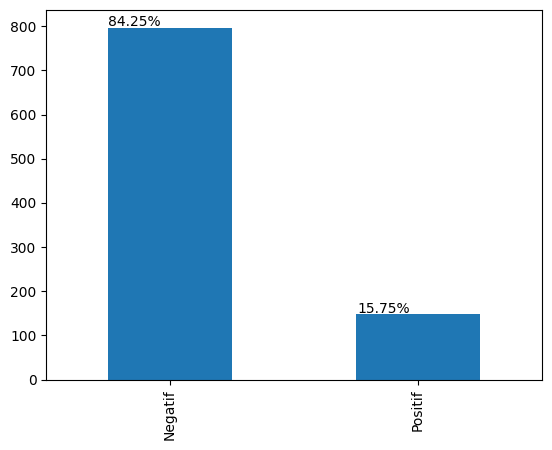

In [ ]:
s = pd.value_counts(DataKlasifikasi['klasifikasi_bayes'])
ax = s.plot.bar()
n = len(DataKlasifikasi.index)
print(n)
for p in ax.patches:
  ax.annotate(str(round(p.get_height() / n * 100, 2)) + '%', (p.get_x() * 1.005, p.get_height() * 1.005))

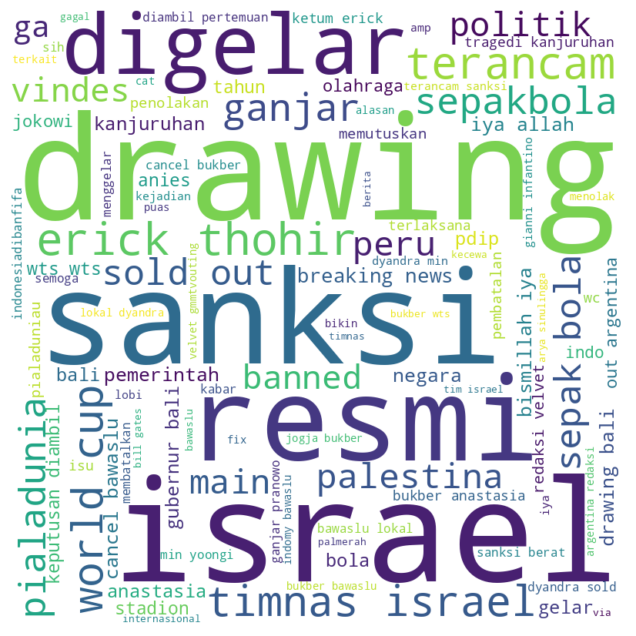

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

"""# Load data from CSV file
df = pd.read_csv('/content/FIFAHasil.csv', encoding='utf-8')
"""
# Concatenate all text data into one string
text = ' '.join(DataKlasifikasi['Hasil'])

# Generate wordcloud
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100, contour_width=3,
                      contour_color='steelblue', stopwords={"indonesia", "tuan", "rumah", "batal"})
wordcloud.generate(text)

# Visualize the wordcloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

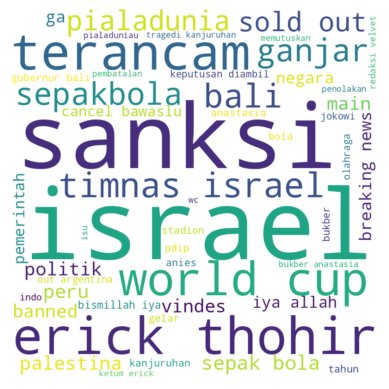

In [ ]:
"""# load data dari file csv
data = pd.read_csv('/content/FIFAHasilKlasifikasi.csv')
"""
# filter data dengan sentimen positif
data_positif = DataKlasifikasi[DataKlasifikasi['Sentiments'] == 'Positif']

# gabungkan semua tweet menjadi satu string
all_tweets = " ".join(tweet for tweet in data_positif['Hasil'])

# generate wordcloud
wordcloud = wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=50, contour_width=3, contour_color='steelblue',
                                  stopwords={"indonesia", "tuan", "rumah", "batal", "wts", "drawing", "resmi", "digelar"})
wordcloud.generate(text)

# tampilkan wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

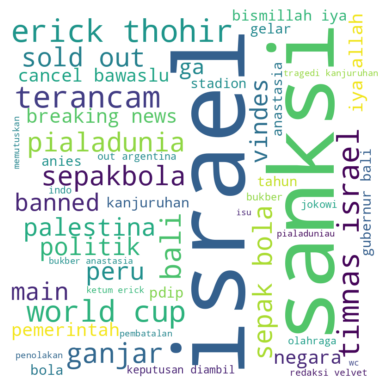

In [ ]:
"""# load data dari file csv
data = pd.read_csv('/content/FIFAHasilKlasifikasi.csv')
"""
# filter data dengan sentimen negatif
data_negatif = DataKlasifikasi[DataKlasifikasi['Sentiments'] == 'Negatif']

# gabungkan semua tweet menjadi satu string
all_tweets = " ".join(tweet for tweet in data_negatif['Hasil'])

# generate wordcloud
wordcloud = wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=50, contour_width=3, contour_color='steelblue',
                                  stopwords={"indonesia", "tuan", "rumah", "batal", "wts", "drawing", "resmi", "digelar"})
wordcloud.generate(text)

# tampilkan wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Confussion Matrix

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.classification_report(DataKlasifikasi['Sentiments'], DataKlasifikasi['klasifikasi_bayes']))

              precision    recall  f1-score   support

     Negatif       0.87      0.96      0.91       718
     Positif       0.82      0.54      0.65       228

    accuracy                           0.86       946
   macro avg       0.84      0.75      0.78       946
weighted avg       0.86      0.86      0.85       946



In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

"""# load dataset
data = pd.read_excel("/content/pembobotanU20.xlsx")"""

# pisahkan kolom label dari dataset
true_labels = DataKlasifikasi["Sentiments"]
predicted_labels = DataKlasifikasi["klasifikasi_bayes"]

# hitung confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# tampilkan hasil
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[691  27]
 [106 122]]


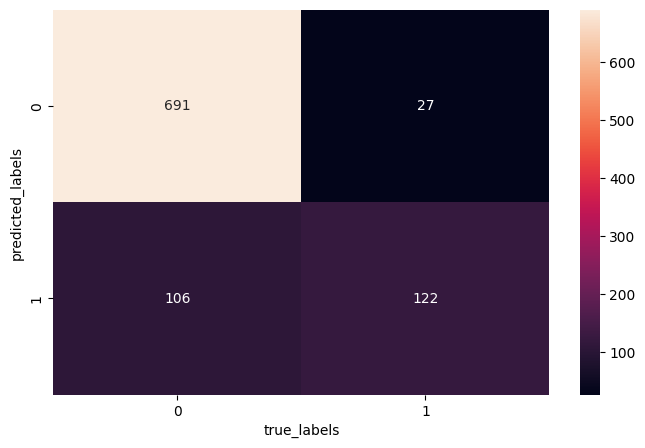

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(true_labels, predicted_labels), annot=True, fmt=".0f", ax=ax)
plt.xlabel("true_labels")
plt.ylabel("predicted_labels")
plt.show()